<a href="https://colab.research.google.com/github/pbplop29/ECE_Calculators/blob/main/Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***HISTOGRAM EQUALIZATION PROBLEM***
***The following are provided***
  - rk and nk

***You need to find***
  - Prk, Sk, Snk and PSk

***And Compare Prk and PSk***

In [318]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib as mp

# INSERT BELOW THE PROVIDED VALUES

> ### Insert the bit-values in ***rk*** and the number of pixels they cover in ***nk***

In [319]:
rk = [0,1,2,3,4,5,6,7];
nk = [10,10,50,100,400,300,130,24]

In [320]:

Prk = []
MN = 0
for i in range(0,len(nk)):
  MN+=nk[i]


for i in range(0,len(nk)):
  Prk.append(float(round((nk[i]/MN),4)))

list_of_tuples = list(zip(rk, nk, Prk))

first_table = pd.DataFrame(list_of_tuples,
                  columns = ['rk', 'nk', 'Prk'])
    


In [321]:
Sk=[]
sum = 0;
for i in range(0,len(nk)):
  sum+=Prk[i]
  Sk.append(round((7*sum),4))

In [322]:
Sk_int = []
for i in range(0,len(Sk)):
  Sk_int.append(int(round(Sk[i],0)))
Sk = Sk_int
first_table['Sk'] = Sk

In [323]:
Sk_mapped = [0,1,2,3,4,5,6,7]
rk_mapped = []

In [324]:
for i in range(0,len(Sk_mapped)):
  temp = []
  for j in range (0,len(Sk_mapped)):
    if(Sk[j]==Sk_mapped[i]):
      temp.append(rk[j])
  rk_mapped.append(temp)

In [325]:
list_of_tuples = list(zip(rk, nk, Prk, Sk, Sk_mapped, rk_mapped))

second_table = pd.DataFrame(list_of_tuples,
                  columns = ['rk', 'nk', 'Prk', 'Sk', 'Sk_mapped', 'rk_mapped'])

In [326]:
Snk = []

for i in range(0,len(Sk_mapped)):
  temp = 0
  for j in range(0,len(rk_mapped[i])):
    temp+=nk[rk_mapped[i][j]]

  Snk.append(temp)

PSk = []

for i in range(0,len(Snk)):
  PSk.append(float(round((Snk[i]/MN),3)))


In [327]:
list_of_tuples = list(zip(rk, nk, Prk, Sk, Sk_mapped, rk_mapped,Snk,PSk))
third_table = pd.DataFrame(list_of_tuples,
                  columns = ['rk', 'nk', 'Prk', 'Sk', 'Sk_mapped', 'rk_mapped', 'Snk', 'PSk'])
third_table.style.hide_index()

rk,nk,Prk,Sk,Sk_mapped,rk_mapped,Snk,PSk
0,10,0.009800,0,0,"[0, 1, 2]",70,0.068000
1,10,0.009800,0,1,[3],100,0.098000
2,50,0.048800,0,2,[],0,0.000000
3,100,0.097700,1,3,[],0,0.000000
4,400,0.390600,4,4,[4],400,0.391000
5,300,0.293000,6,5,[],0,0.000000
6,130,0.127000,7,6,[5],300,0.293000
7,24,0.023400,7,7,"[6, 7]",154,0.150000


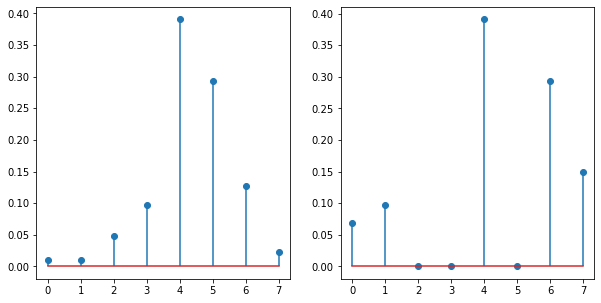

In [328]:
fig, axs = plt.subplots(1,2)
axs[0].stem(rk, Prk, use_line_collection = True)
axs[1].stem(Sk_mapped, PSk, use_line_collection = True)
fig = mp.pyplot.gcf()
fig.set_size_inches(10, 5)